<a href="https://colab.research.google.com/github/Jayasurya227/-Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1:Import necessary Libraries Amd Loading Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#set plot style
sns.set_style('whitegrid')

In [ ]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.77 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import pandas as pd

df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
pd.set_option('display.max_columns',None)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 2: Data Cleaning and Intial Preparing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.shape

(7043, 21)

In [ ]:
#converting total charges
df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(f"Number of missing TotalCharges: {df.TotalCharges.isnull().sum()}")

Number of missing TotalCharges: 0


In [ ]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [ ]:
df['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
df['Churn']=df['Churn'].map({'Yes':1,"No":0})
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
df['Churn'].isna().sum()

np.int64(0)

In [ ]:
df.dropna(subset=['Churn'],inplace=True)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**Step 3: Model1- Baseline Perfomance(Without Feature Engineering)**

In [ ]:
x_base=df.drop('Churn',axis=1)
y_base=df['Churn']

##Identify Categorical and Numerical Features
numerical_features=x_base.select_dtypes(exclude=['object']).columns
categorical_features=x_base.select_dtypes(include=['object']).columns

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")


Numerical Features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical Features: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
## Creating preprocessing pipeline
preprocessor_base=ColumnTransformer([
    ('num_pipeline',StandardScaler(),numerical_features),
    ('cat_pipeline',OneHotEncoder(handle_unknown='ignore'),categorical_features)
])

In [ ]:
preprocessor_base

ColumnTransformer(transformers=[('num_pipeline', StandardScaler(),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [ ]:
## Split Data
x_train_base,x_test_base,y_train_base,y_test_base=train_test_split(x_base,y_base,test_size=0.2,random_state=42,stratify=y_base)

In [ ]:
## Create the full pipeline
pipeline_base=Pipeline(steps=[
    ('preprocessor',preprocessor_base),
    ('classifier',LogisticRegression(random_state=42,max_iter=1000))
])

In [ ]:
pipeline_base

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
## Train and Evalute the model
pipeline_base.fit(x_train_base,y_train_base)
y_pred_base=pipeline_base.predict(x_test_base)

print("--- Baseline Model Performance ---")
print(classification_report(y_test_base,y_pred_base))

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



**Step 4: The Core Task- Feature Engineering**

In [ ]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [ ]:
df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
df_eng=df.copy()

In [ ]:
## 1. Binning 'Tenure'
bins=[0,12,24,48,60,72]
labels=['0-1 year','1-2 years','2-4 years','4-5 years','5+ years']
df_eng['tenure_bins']=pd.cut(df_eng['tenure'],bins=bins,labels=labels,include_lowest=True)


In [ ]:
df_eng['tenure_bins']

,tenure_bins
0,0-1 year
1,2-4 years
2,0-1 year
3,2-4 years
4,0-1 year
...,...
7038,1-2 years
7039,5+ years
7040,0-1 year
7041,0-1 year


In [ ]:
df_eng.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 year
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 year
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 year


In [ ]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [ ]:
## Simplyfy Categorical Features
df_eng['MultipleLines']=df_eng['MultipleLines'].replace({'No phone service':'No'})

In [ ]:
df_eng['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [ ]:
for coi in['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
  df_eng[coi]=df_eng[coi].replace({'No internet service':'No'})

In [ ]:
df_eng['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,5024
Yes,2019


In [ ]:
## 3. Creating interaction/Combination features
service_columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df_eng['num_add_services'] = df_eng[service_columns].apply(lambda row: row.map({'Yes': 1, 'No': 0}).sum(), axis=1)

In [ ]:
df_eng.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins,num_add_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 year,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 years,2


In [ ]:
#4.Create a features for monthly charge to tenure ratio
df_eng['monthly_charge_per_tenure']=df_eng['MonthlyCharges']/df_eng['tenure']

In [ ]:
df_eng.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins,num_add_services,monthly_charge_per_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 year,1,29.850
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 years,2,1.675


**Step 5:Model 2- Perfomence with Engineered Features**

In [ ]:
# Drop rows where tenure is 0 to avoid infinite values in monthly_charge_per_tenure
df_eng = df_eng[df_eng['tenure'] > 0].copy()

# Recalculate monthly_charge_per_tenure after dropping rows with tenure 0
df_eng['monthly_charge_per_tenure'] = df_eng['MonthlyCharges'] / df_eng['tenure']

print("Shape of df_eng after dropping rows with tenure 0:", df_eng.shape)

## Define features(x) and target(y) for the engineered dataset
x_eng=df_eng.drop(['customerID','tenure','MonthlyCharges','TotalCharges','Churn'],axis=1)
y_eng=df_eng['Churn']

##Identify new features types
numerical_features_eng=x_eng.select_dtypes(include=np.number).columns.tolist()

#Note 'tenure_group' is now a categorical feature
categorical_features_eng=x_eng.select_dtypes(include=['object','category']).columns.tolist()

#create the new preprocessing Pipeline
preprocessor_eng=ColumnTransformer([
    ('num_pipeline',StandardScaler(),numerical_features_eng),
    ('cat_pipeline',OneHotEncoder(handle_unknown='ignore'),categorical_features_eng)
])

#Split the data
x_train_eng,x_test_eng,y_train_eng,y_test_eng=train_test_split(x_eng,y_eng,test_size=0.2,random_state=42,stratify=y_eng)

#create the full pipeline with the same classifier for a fair comparision
enhanced_model=Pipeline(steps=[
    ('preprocessor',preprocessor_eng),
    ('classifier',LogisticRegression(random_state=42,max_iter=1000))
])

#Train and Evalute th e enhanced model
enhanced_model.fit(x_train_eng,y_train_eng)
y_pred_eng=enhanced_model.predict(x_test_eng)

print("--- Enhanced Model Performance ---")
print(classification_report(y_test_eng,y_pred_eng))

Shape of df_eng after dropping rows with tenure 0: (7032, 24)
--- Enhanced Model Performance ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



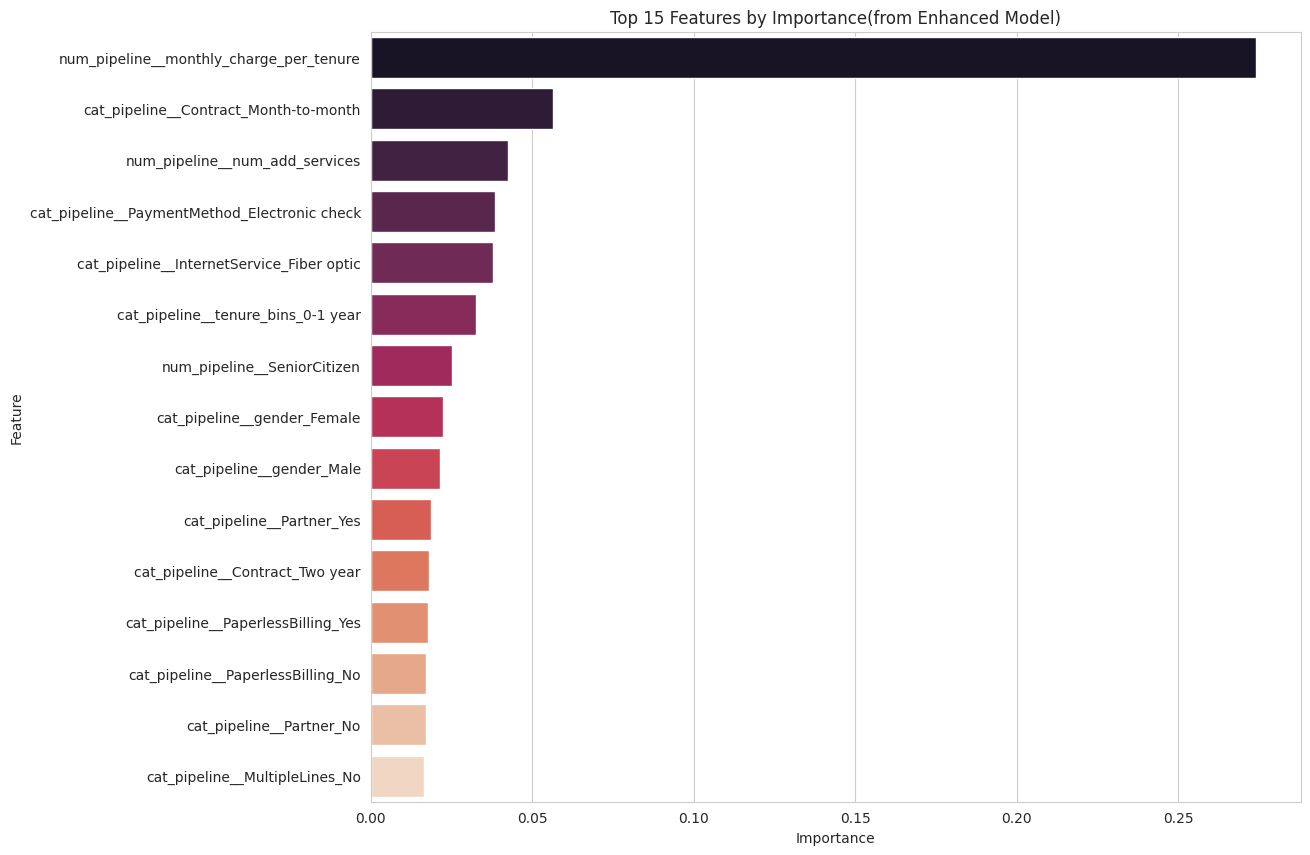

In [ ]:
# To get features,let's quickly train a Random Forest Model with the engineered data
rf_model=Pipeline(steps=[
    ('preprocessor',preprocessor_eng),
    ('classifier',RandomForestClassifier(random_state=42))
])

rf_model.fit(x_train_eng,y_train_eng)

#Extraxt feature names after one_hot encoding
feature_nmes=rf_model.named_steps['preprocessor'].get_feature_names_out()
importance=rf_model.named_steps['classifier'].feature_importances_

#Create a DataFrame to display feature importance
feature_importance_df=pd.DataFrame({'Feature':feature_nmes,'Importance':importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False).head(15)

plt.figure(figsize=(12,10))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='rocket',hue='Feature',legend=False)
plt.title('Top 15 Features by Importance(from Enhanced Model)')
plt.show()

**Step 6:Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#Instantiate a RandomForestClassifier to use as the base estimator for feature selection
rf_selector=RandomForestClassifier(random_state=42)

#Instantiate SelectFromModel
#Using 'median' as the threshold means features with importance greter then the median importance will bs selected
selector=SelectFromModel(rf_selector,threshold='median',prefit=False)

# Create a pipeline for feature selection
feature_selection_pipeline=Pipeline(steps=[
     ('preprocessor',preprocessor_eng),
     ('selector',selector)
 ])

# Fit the preprocessor to the training data and transform it
feature_selection_pipeline.fit(x_train_eng,y_train_eng)


# Transform the training and testing data to get the selected features
x_train_selected=feature_selection_pipeline.transform(x_train_eng)
x_test_selected=feature_selection_pipeline.transform(x_test_eng)

#Print the shapes to compare
print("Shape of x_train before feature selection:",x_train_eng.shape)
print("Shape of x_train after feature selection:",x_train_selected.shape)

Shape of x_train before feature selection: (5625, 19)
Shape of x_train after feature selection: (5625, 22)


** Train the model with selected Features**

In [ ]:
#Create the full pipeline with the preprocessor and the classifier
selected_features_model=Pipeline(steps=[
    # Removing the preprocessor as the data is already preprocessed and selected
    # ('preprocessor',preprocessor_eng),
    ('classifier',LogisticRegression(random_state=42,max_iter=1000))
])

#Train the model using selected features
selected_features_model.fit(x_train_selected,y_train_eng)

# Evaluate the model with selected features
y_pred_selected = selected_features_model.predict(x_test_selected)

print("--- Model Performance with Selected Features ---")
print(classification_report(y_test_eng, y_pred_selected))

--- Model Performance with Selected Features ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**Compare Model Perfomence**

In [ ]:
print("--- Baseline Model Performance ---")
print(classification_report(y_test_base,y_pred_base))

print("\n--- Enhanced Model Performance ---")
print(classification_report(y_test_eng,y_pred_eng))

print("\n--- Model Performance with Selected Features ---")
print(classification_report(y_test_eng,y_pred_selected))

#Summarize the perfomence metrics
print("\n--- Model Performance Summary ---")
print('Metrics         | Baseline Model | Enhanced Model | Selected Features Model')
print("----------------------------------------------------------------")
print(f"Accuracy        | {accuracy_score(y_test_base,y_pred_base):.4f} | {accuracy_score(y_test_eng,y_pred_eng):.4f} | {accuracy_score(y_test_eng,y_pred_selected):.4f}")

#Extract F1-score for class 1(churn) from classification reports
report_base=classification_report(y_test_base,y_pred_base,output_dict=True)
report_eng=classification_report(y_test_eng,y_pred_eng,output_dict=True)
report_selected=classification_report(y_test_eng,y_pred_selected,output_dict=True)

f1_churn_base=report_base['1']['f1-score']
f1_churn_eng=report_eng['1']['f1-score']
f1_churn_selected=report_selected['1']['f1-score']

print(f"F1-Score (Class 1) | {f1_churn_base:.4f} | {f1_churn_eng:.4f} | {f1_churn_selected:.4f}")

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


--- Enhanced Model Performance ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407


--- Model Performance with Selected Features ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macr